In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Loading Dataset**

In [2]:
df = pd.read_csv(r"/content/Indian_Kids_Screen_Time.csv")
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [3]:
# Check missing values
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


**2. Handling missing values and inconsistent categories**

In [5]:
df['Health_Impacts'] = df['Health_Impacts'].fillna("No Health Impact")
# Verify
print("\nAfter preprocessing:\n", df.isnull().sum())
df.head()


After preprocessing:
 Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,No Health Impact,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


**3. creating derived fields : age bands**

In [7]:
def age_band(age):
    if 8 <= age <= 12:
        return "Pre-teens"
    elif 13 <= age <= 16:
        return "Teenagers"
    elif 17 <= age <= 18:
        return "Late teens"
    else:
        return "Other"

df['Age_Band'] = df['Age'].apply(age_band)
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Teenagers
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-teens
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Late teens
3,15,Female,1.21,Laptop,False,0.39,No Health Impact,Urban,Teenagers
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-teens


**4. Device Classification**

In [9]:
def device_category(device):
    device = str(device).strip().lower()
    if "tv" in device:
        return "Wallmounted"
    elif any(x in device for x in ["smartphone", "laptop", "tablet"]):
        return "Portable"
    else:
        return "Other"

df['Device_Type'] = df['Primary_Device'].apply(device_category)
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,Device_Type
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Teenagers,Portable
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-teens,Portable
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Late teens,Wallmounted
3,15,Female,1.21,Laptop,False,0.39,No Health Impact,Urban,Teenagers,Portable
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-teens,Portable


**classifying health impact into physical/mental/both**

In [16]:


# Fill missing with default
df['Health_Impacts'] = df['Health_Impacts'].fillna("No Health Impact")

# Standardize text (lowercase for easier matching)
df['Health_Impacts'] = df['Health_Impacts'].str.strip().str.lower()

# Function to classify health impacts
def classify_health_impact(text):
    if text == "no health impact":
        return "None"

    physical_keywords = ["eye", "vision", "headache", "sleep", "posture", "fatigue"]
    mental_keywords = ["stress", "anxiety", "mood", "attention", "addiction", "irritability"]

    found_physical = any(word in text for word in physical_keywords)
    found_mental = any(word in text for word in mental_keywords)

    if found_physical and found_mental:
        return "Physical & Mental"
    elif found_physical:
        return "Physical"
    elif found_mental:
        return "Mental"
    else:
        return "Other"

# Apply classification
df['Health_Impact_Type'] = df['Health_Impacts'].apply(classify_health_impact)

# Preview
print(df[['Health_Impacts', 'Health_Impact_Type']].head(20))
df.head()


              Health_Impacts Health_Impact_Type
0     poor sleep, eye strain           Physical
1                 poor sleep           Physical
2                 poor sleep           Physical
3           no health impact               None
4        poor sleep, anxiety  Physical & Mental
5                 poor sleep           Physical
6           no health impact               None
7           no health impact               None
8        poor sleep, anxiety  Physical & Mental
9   poor sleep, obesity risk           Physical
10                poor sleep           Physical
11                poor sleep           Physical
12                poor sleep           Physical
13                eye strain           Physical
14                poor sleep           Physical
15                poor sleep           Physical
16    poor sleep, eye strain           Physical
17              obesity risk              Other
18                   anxiety             Mental
19          no health impact            

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,Device_Type,Health_Impact_Type
0,14,Male,3.99,Smartphone,True,0.42,"poor sleep, eye strain",Urban,Teenagers,Portable,Physical
1,11,Female,4.61,Laptop,True,0.30,poor sleep,Urban,Pre-teens,Portable,Physical
2,18,Female,3.73,TV,True,0.32,poor sleep,Urban,Late teens,Wallmounted,Physical
3,15,Female,1.21,Laptop,False,0.39,no health impact,Urban,Teenagers,Portable,None
4,12,Female,5.89,Smartphone,True,0.49,"poor sleep, anxiety",Urban,Pre-teens,Portable,Physical & Mental


**device/activity shares**

In [18]:
# 3. Device/Activity Shares
# Since only 'Primary_Device' and 'Avg_Daily_Screen_Time_hr' are available,
# we can calculate proportional usage based on device type counts

device_counts = df['Primary_Device'].value_counts(normalize=True)
print("\nDevice usage proportion:\n", device_counts)

# Optional: Add a column mapping each device to its share (simplified example)
def device_share(device):
    if pd.isna(device):
        return 0
    return device_counts.get(device, 0)

df['Device_Share'] = df['Primary_Device'].apply(device_share)

# 4. Educational to Recreational Ratio
# You already have 'Educational_to_Recreational_Ratio'; you can normalize if needed
# Example: convert to percentage
df['Edu_Recreational_Percent'] = df['Educational_to_Recreational_Ratio'] * 100
df.head()



Device usage proportion:
 Primary_Device
Smartphone    0.470346
TV            0.256075
Laptop        0.147549
Tablet        0.126030
Name: proportion, dtype: float64


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,Device_Type,Health_Impact_Type,Device_Share,Edu_Recreational_Percent
0,14,Male,3.99,Smartphone,True,0.42,"poor sleep, eye strain",Urban,Teenagers,Portable,Physical,0.470346,42.0
1,11,Female,4.61,Laptop,True,0.30,poor sleep,Urban,Pre-teens,Portable,Physical,0.147549,30.0
2,18,Female,3.73,TV,True,0.32,poor sleep,Urban,Late teens,Wallmounted,Physical,0.256075,32.0
3,15,Female,1.21,Laptop,False,0.39,no health impact,Urban,Teenagers,Portable,None,0.147549,39.0
4,12,Female,5.89,Smartphone,True,0.49,"poor sleep, anxiety",Urban,Pre-teens,Portable,Physical & Mental,0.470346,49.0


**. Save preprocessed data for reuse; document logic**

In [19]:
# 5. Save preprocessed dataset
df.to_csv("Indian_Kids_Screen_Time_cleaned.csv", index=False)
# 6. Verify
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,Device_Type,Health_Impact_Type,Device_Share,Edu_Recreational_Percent
0,14,Male,3.99,Smartphone,True,0.42,"poor sleep, eye strain",Urban,Teenagers,Portable,Physical,0.470346,42.0
1,11,Female,4.61,Laptop,True,0.30,poor sleep,Urban,Pre-teens,Portable,Physical,0.147549,30.0
2,18,Female,3.73,TV,True,0.32,poor sleep,Urban,Late teens,Wallmounted,Physical,0.256075,32.0
3,15,Female,1.21,Laptop,False,0.39,no health impact,Urban,Teenagers,Portable,None,0.147549,39.0
4,12,Female,5.89,Smartphone,True,0.49,"poor sleep, anxiety",Urban,Pre-teens,Portable,Physical & Mental,0.470346,49.0


In [23]:
print(df['Health_Impact_Type'].value_counts())
print(df['Age_Band'].value_counts())
print(df['Device_Type'].value_counts())


Health_Impact_Type
Physical             4637
None                 3218
Physical & Mental    1151
Mental                454
Other                 252
Name: count, dtype: int64
Age_Band
Pre-teens     4407
Teenagers     3546
Late teens    1759
Name: count, dtype: int64
Device_Type
Portable       7225
Wallmounted    2487
Name: count, dtype: int64


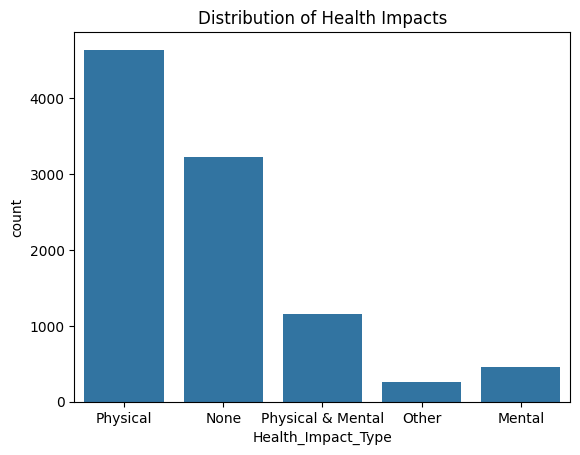

In [24]:
sns.countplot(x="Health_Impact_Type", data=df)
plt.title("Distribution of Health Impacts")
plt.show()


# Understanding from Preprocessing Code

### 1. Handling Missing Values
- The dataset had missing values in the **Health_Impacts** column.  
- These were replaced with `"No Health Impact"` so that no data is lost and analysis can still be done.

---

### 2. Creating Age Bands
- Children were grouped into categories:
  - *Pre-teens (8–12 years)*  
  - *Teenagers (13–16 years)*  
  - *Late teens (17–18 years)*  
  - *Other (outside the expected range)*  
- This helps in comparing screen time habits between different age groups.

---

### 3. Device Classification
- Devices were classified as:
  - **Wallmounted** → TV  
  - **Portable** → Smartphone, Laptop, Tablet  
  - **Other** → Any device not listed above  
- This makes it easier to see which types of devices are used most.

---

### 4. Health Impacts Classification
- Health issues were categorized into:
  - **Physical** (eye strain, sleep problems, headaches, etc.)  
  - **Mental** (stress, anxiety, mood swings, etc.)  
  - **Physical & Mental** (when both are present)  
  - **None** (no reported health issues)  
- This allows studying how screen time affects kids’ physical and mental well-being.

---

### 5. Device Usage Share
- The proportion of each device type was calculated as **Device_Share**.  
- This shows what percentage of kids use each device as their primary screen.

---

### 6. Educational to Recreational Ratio
- The ratio was converted into a percentage → **Edu_Recreational_Percent**.  
- This makes it clear how much of the screen time is spent on **education vs. recreation**.

---

### 7. Saving Preprocessed Data
- The cleaned dataset was saved as:  
  **`Indian_Kids_Screen_Time_cleaned.csv`**  
- This ensures we can directly use the processed dataset for further analysis/visualization.
